<a href="https://colab.research.google.com/github/KosukhaOlexandr/reactions_prediction/blob/main/reactions_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd

with open('/content/drive/MyDrive/reaction_prediction/concatenated_pos_neg.csv') as f:
  data = pd.read_csv(f, index_col = 0)

In [ ]:
data

,msg_text,reaction_type
0,чий борщ у п’ятницю липня юнеско вирішить долю...,1
1,зруйнований міст у демидові на київщині планую...,1
2,безперечно головне слово сьогодні зміїний мабу...,1
3,прокремлівське видання общественная служба нов...,1
4,продовжується відвантаження боєприпасів продов...,1
...,...,...
63489,жителі черкас сьогодні на окраїні міста з до г...,1
63490,командування впс зсу під час нальоту окупантів...,1
63491,увага повітряна тривога у вінниці і черкасах,0
63492,увага у києві оголошена повітряна тривога прос...,0


#Naive Bayes

##Count Vectorizer

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer()
bow = count_vec.fit_transform(data.msg_text)

X = bow
Y = data.reaction_type

In [ ]:
from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, Y_train_cv, Y_test_cv = train_test_split(X, Y, test_size = 0.20, stratify = Y, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_cv = MultinomialNB(alpha = 0.01).fit(X_train_cv, Y_train_cv)

In [ ]:
Y_pred_test = nb_cv.predict(X_test_cv)
Y_pred_train = nb_cv.predict(X_train_cv)

In [ ]:
from sklearn.metrics import accuracy_score

print('Test set accuracy:', accuracy_score(Y_test_cv, Y_pred_test))
print('Train set accuracy:', accuracy_score(Y_train_cv, Y_pred_train))

Test set accuracy: 0.8180171667060399
Train set accuracy: 0.9152278767595236


In [ ]:
from sklearn.metrics import f1_score

print('Test set F1 score:', f1_score(Y_test_cv, Y_pred_test))
print('Train set F1 score:', f1_score(Y_train_cv, Y_pred_train))

Test set F1 score: 0.8431838230304675
Train set F1 score: 0.9256458074319658


##TF-IDF Vectorizer

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vec = TfidfVectorizer()
bow_ti = tf_idf_vec.fit_transform(data.msg_text)
#bow_ti = np.array(bow_ti.todense())
bow_ti

<63494x119493 sparse matrix of type '<class 'numpy.float64'>'
	with 2479084 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X = bow_ti
Y = data.reaction_type

X_train_ti, X_test_ti, Y_train_ti, Y_test_ti = train_test_split(X, Y, test_size = 0.20, stratify = Y, random_state = 42)

nb_tf_idf = MultinomialNB(alpha = 0.01).fit(X_train_ti, Y_train_ti)

In [ ]:
Y_pred_test = nb_tf_idf.predict(X_test_ti)
Y_pred_train = nb_tf_idf.predict(X_train_ti)

In [ ]:
from sklearn.metrics import accuracy_score

print('Test set accuracy:', accuracy_score(Y_test_ti, Y_pred_test))
print('Train set accuracy:', accuracy_score(Y_train_ti, Y_pred_train))

Test set accuracy: 0.8257343097881723
Train set accuracy: 0.9244216950487253


In [ ]:
from sklearn.metrics import f1_score

print('Test set F1 score:', f1_score(Y_test_ti, Y_pred_test))
print('Train set F1 score:', f1_score(Y_train_ti, Y_pred_train))

Test set F1 score: 0.8563080319459775
Train set F1 score: 0.9357887166106343


#Misscalssified analysis

In [ ]:
X_test_ser = pd.Series(tf_idf_vec.inverse_transform(X_test_ti))

In [ ]:
Y_test_ti.reset_index(drop = True).loc[(Y_test_ti.reset_index(drop = True) != pd.Series(Y_pred_test))]

4        0
7        1
13       1
30       0
41       1
        ..
12659    0
12665    0
12667    0
12683    0
12694    0
Name: reaction_type, Length: 2213, dtype: int64

In [ ]:
pd.set_option('display.max_colwidth', None)
misclass = pd.concat([X_test_ser.loc[(Y_test_ti.reset_index(drop = True) != pd.Series(Y_pred_test))],
          Y_test_ti.reset_index(drop = True).loc[(Y_test_ti.reset_index(drop = True) != pd.Series(Y_pred_test))],
          pd.Series(Y_pred_test).loc[(Y_test_ti.reset_index(drop = True) != pd.Series(Y_pred_test))]], axis = 1)
misclass.columns = ['text', 'true_reaction', 'pred_reaction']
misclass

,text,true_reaction,pred_reaction
4,"[існувала, ігната, вітань, різна, завдавала, деяку, переміщень, існуватиме, полковника, безумовно, використовувала, юрія, використати, готуватися, надалі, служби, зрозуміло, днем, мусимо, речника, загроза, велике, використовує, скоро, повномасштабної, готові, дати, командування, такі, цих, інформацію, незалежності, словами, завжди, інші, противник, цього, агресії, територію, інформація, нас, днів, перших, гур, щодо, від, росія, мають, бути, треба, раніше, зсу, звідти, наразі, ми, ударів, україни, україну, тому, може, свято, наступу, до, білорусі, для, що, сил, повітряних, день, за, на, та]",0,1
7,"[денежникове, проукраїнськиналаштованих, овт, контрдиверсійних, переселення, лікарняних, горлівка, штормове, доставлено, важкопоранених, електропідстанції, енергетичної, фермерів, примусове, вивезено, уразили, застосовано, повному, останніх, околиці, київській, львівській, зазнавати, збито, зрк, завдала, вінницькій, наша, детальніше, авіація, закладів, північно, силами, минулого, удари, масованого, крилатих, тижня, позицію, уточнюється, тес, приводом, тец, особового, зайнятій, район, воїни, дій, завдав, населених, здійснив, складу, оперативна, попередньою, комплексу, ракетного, зенітного, пунктів, генштабу, військовослужбовців, близько, жителів, позиціях, озброєння, продовжує, будинки, житлові, єктах, доби, зведенні, зазнали, залпового, систем, реактивних, києві, обстрілів, районах, областях, вторгнення, ночі, протягом, противник, дня, противника, зосередження, наших, цієї, нашої, було, інфраструктури, об, військ, міста, місті, тимчасово, інформація, втрат, луганської, позиції, західної, ...]",1,0
13,"[точнісінько, шахед, стратегічні, влучають, gepard, німецького, комунікації, фото, захисники, наші, зсу]",1,0
30,"[топонімії, деколонізацію, висловиться, географічних, визначатися, пропагують, символізують, часі, назвою, новомосковська, заборонити, бажання, назви, перейменування, зареєстрований, єктів, врахувати, чекає, тоді, мешканців, більшість, буде, вважає, війні, дніпропетровщині, мер, словами, якщо, об, міста, влада, перемоги, пропонують, депутати, законопроєкт, раді, треба, його, зараз, для, що, не, за, на, рф, про]",0,1
41,"[автобусної, впала, зірвалась, золочівському, надзвичайники, садовий, прильотів, зупинки, працюють, ракета, місці, роботі, було, львові, повідомив, ппо, завдяки, біля, зараз, але, районі, не, на]",1,0
...,...,...,...
12659,"[убити, попасної, перехопили, військовополонених, озброєнь, атакує, наказ, обстрілюють, бої, видів, розвідники, розмови, постійно, луганщині, йдеться, йдуть, місті, позиції, ворог, всіх, усіх, російських, яких, зсу, окупантів, українські, районі, на, про]",0,1
12665,"[розбрату, яблуком, неоднозначно, згадав, конфліктів, назвавши, одесу, символом, найкрасивіших, вирішення, світі, яке, одним, путін, бути, місто, може]",0,1
12667,"[учепитися, перетерли, белта, оголошувати, мобілізація, слідом, місток, брехня, перекинути, жодної, створити, планує, мобілізацію, пропагандистів, країні, буде, ситуацію, мобілізації, якщо, нас, цей, намагаються, повідомляє, заявив, лукашенко, треба, їм, би, вас, щось, це, нічого, росії, ця, що, видання, не, за, на, рф, те, про]",0,1
12683,"[червоний, направити, оленівці, загибелі, хрест, пораненим, експертів, подій, провести, розслідування, оон, готові, хоче, групу, просить, полонених, допомогти, місця, доступ, щоб, він, також, українських, для]",0,1


In [ ]:
Y_test_ti[Y_test_ti == 1].shape

(7330,)

In [ ]:
Y_test_ti.shape

(12699,)

In [ ]:
misclass.loc[(misclass.true_reaction == 1) & (misclass.pred_reaction == 0)].shape

(736, 3)

#SVC

### TF-IDF

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = bow_ti
Y = data.reaction_type

svc_tf_idf = make_pipeline(StandardScaler(with_mean=False), SVC(C = 1, gamma='auto'))
svc_tf_idf.fit(X_train_ti, Y_train_ti)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('svc', SVC(C=1, gamma='auto'))])

In [ ]:
Y_pred_test = svc_tf_idf.predict(X_test_ti)
Y_pred_train = svc_tf_idf.predict(X_train_ti)

In [ ]:
from sklearn.metrics import accuracy_score

print('Test set accuracy:', accuracy_score(Y_test_ti, Y_pred_test))
print('Train set accuracy:', accuracy_score(Y_train_ti, Y_pred_train))

Test set accuracy: 0.8132136388692023
Train set accuracy: 0.9776355940545329


In [ ]:
from sklearn.metrics import f1_score

print('Test set F1 score:', f1_score(Y_test_ti, Y_pred_test))
print('Train set F1 score:', f1_score(Y_train_ti, Y_pred_train))

Test set F1 score: 0.8550122249388752
Train set F1 score: 0.9807353140686474


### Count Vectorizer

In [ ]:
svc_cv = make_pipeline(StandardScaler(with_mean=False), SVC(C = 1, gamma='auto'))
svc_cv.fit(X_train_cv, Y_train_cv)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('svc', SVC(C=1, gamma='auto'))])

In [ ]:
Y_pred_test = svc_cv.predict(X_test_cv)
Y_pred_train = svc_cv.predict(X_train_cv)

In [ ]:
print('Test set accuracy:', accuracy_score(Y_test_cv, Y_pred_test))
print('Train set accuracy:', accuracy_score(Y_train_cv, Y_pred_train))

print('Test set F1 score:', f1_score(Y_test_cv, Y_pred_test))
print('Train set F1 score:', f1_score(Y_train_cv, Y_pred_train))

Test set accuracy: 0.8195133475076778
Train set accuracy: 0.9668865045772221
Test set F1 score: 0.8567679040119985
Train set F1 score: 0.9714692811344438


#ROC

So now we have 4 models:
- nb_cv
- nb_tf_idf
- svc_cv
- svc_tf_idf


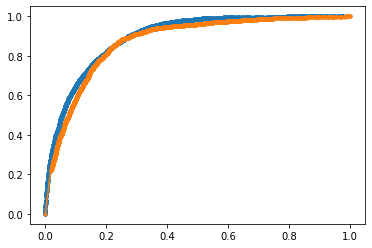

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc

nb_cv_score = nb_cv.predict_proba(X_test_cv)
nb_tf_idf_score = nb_tf_idf.predict_proba(X_test_ti)
#svc_cv_score = svc_cv.predict_proba(X_test_cv)
#svc_tf_idf_score = svc_tf_idf.predict_proba(X_test_ti)

fpr_nb_cv_gnb, tpr_nb_cv_gnb, thresholds_gnb = roc_curve(Y_test_cv, nb_cv_score[:, 1])
fpr_nb_tf_idf, tpr_nb_tf_idf, _ = roc_curve(Y_test_ti, nb_tf_idf_score[:, 1])
#fpr_svc_cv, tpr_svc_cv, _ = roc_curve(Y_test_cv, svc_cv_score[:, 1])
#fpr_svc_tf_idf, tpr_svc_tf_idf, _ = roc_curve(Y_test_ti, svc_tf_idf_score[:, 1]) 

#plt.plot(fpr_svc_cv, tpr_svc_cv, marker='.', label = 'svc_cv')
#plt.plot(fpr_svc_tf_idf, tpr_svc_tf_idf, marker='.', label = 'svc_tf_idf')
plt.plot(fpr_nb_tf_idf, tpr_nb_tf_idf, marker='.', label='nb_ti')
plt.plot(fpr_nb_cv_gnb, tpr_nb_cv_gnb, marker='.', label='nb_cv')


# Choosing and saving the best model

The best model so far is Naive Bayes with TF-IDF vectorization and f1_score 0.86

In [ ]:
# we need to save vectorizer and fitter
from joblib import dump, load

dump(tf_idf_vec, '/content/drive/My Drive/reaction_prediction/vectorizer.joblib')
dump(nb_tf_idf, '/content/drive/My Drive/reaction_prediction/model.joblib')

# saving training set
data.to_csv('/content/drive/My Drive/reaction_prediction/train_set.csv')